0 37.146015
100 0.037408046
200 0.0069577224
300 0.0012940895
400 0.00024069817
500 4.4771507e-05
600 8.326368e-06
700 1.548756e-06
800 2.8831704e-07
900 5.3703708e-08
learned parameters [4.7977206e-05 9.9998915e-01]
accuracy 0.45


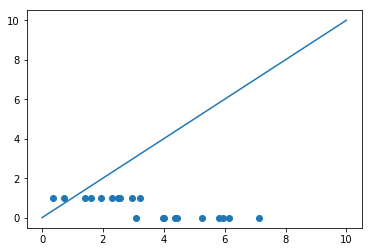

In [2]:
# Linear regression for classification

# Imagine that one of your friend is an avid chess player, and you have records of her win/loss history. Moreover, each game has a
# time limit ranging from 1 to 10 minutes, and your friend always wins short games. 
# You want to challenge her to a game that you’re sure of winning. Obviously, your friend doesn't want to play a long games against you.

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() # If you use tensorlfow 1 instead of tensorflow 2
import numpy as np
import matplotlib.pyplot as plt

x_label0 = np.random.normal(5,1,10)
x_label1 = np.random.normal(2,1,10)
xs = np.append(x_label0,x_label1)
labels = [0.]*len(x_label0)+[1.]*len(x_label1)

plt.scatter(xs,labels)

learning_rate = 0.001
training_epochs = 1000

X = tf.placeholder("float")
Y = tf.placeholder("float")

def model(X,w):
	return tf.add(tf.multiply(w[1],tf.pow(X,1)),tf.multiply(w[0],tf.pow(X,0)))
	
w = tf.Variable([0.,0.],name="parameters")
y_model = model(X,w)
cost = tf.reduce_sum(tf.square(X-y_model))

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
	sess.run(train_op,feed_dict={X: xs, Y: labels})
	current_cost = sess.run(cost,feed_dict={X: xs, Y: labels})
	if epoch%100==0:
		print(epoch,current_cost)

w_val = sess.run(w)
print('learned parameters',w_val)

correct_prediction = tf.equal(Y,tf.to_float(tf.greater(y_model,0.5)))
accuracy = tf.reduce_mean(tf.to_float(correct_prediction))

print('accuracy', sess.run(accuracy,feed_dict={X: xs, Y: labels}))

sess.close()

all_xs = np.linspace(0,10,100)
plt.plot(all_xs, all_xs*w_val[1]+w_val[0])
plt.show()

0 71.64756
100 0.0021390147
200 3.1312033e-05
300 4.5828068e-07
400 6.769792e-09
500 8.2447826e-11
600 4.0536463e-12
700 3.1974423e-14
800 2.6645353e-15
900 0.0
learned parameters [1.476777e-08 1.000000e+00]
accuracy 0.35


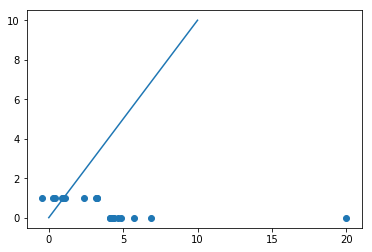

In [4]:
# Linear regression fail miserably. In this example, suppose that your friend lost a game that took 20 minutes.
# The original classifier suggested that you could beat Alice in a three-minute game.
# Your friend would probably agree to play such a short game. But the revised classifier, if you stick
# with the same 0.5 threshold, is now suggesting that the shortest game your friend will lose is a
# five-minute game. Your friend will likely refuse to play such a long game!

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() # If you use tensorlfow 1 instead of tensorflow 2
import numpy as np
import matplotlib.pyplot as plt

x_label0 = np.append(np.random.normal(5,1,9),20) # Replace the previous one with the new parameter: 20 minutes.
x_label1 = np.random.normal(2,1,10)
xs = np.append(x_label0,x_label1)
labels = [0.]*len(x_label0)+[1.]*len(x_label1)

plt.scatter(xs,labels)

learning_rate = 0.001
training_epochs = 1000

X = tf.placeholder("float")
Y = tf.placeholder("float")

def model(X,w):
	return tf.add(tf.multiply(w[1],tf.pow(X,1)),tf.multiply(w[0],tf.pow(X,0)))
	
w = tf.Variable([0.,0.],name="parameters")
y_model = model(X,w)
cost = tf.reduce_sum(tf.square(X-y_model))

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
	sess.run(train_op,feed_dict={X: xs, Y: labels})
	current_cost = sess.run(cost,feed_dict={X: xs, Y: labels})
	if epoch%100==0:
		print(epoch,current_cost)

w_val = sess.run(w)
print('learned parameters',w_val)

correct_prediction = tf.equal(Y,tf.to_float(tf.greater(y_model,0.5)))
accuracy = tf.reduce_mean(tf.to_float(correct_prediction))

print('accuracy', sess.run(accuracy,feed_dict={X: xs, Y: labels}))

sess.close()

all_xs = np.linspace(0,10,100)
plt.plot(all_xs, all_xs*w_val[1]+w_val[0])
plt.show()